<hr><font color="green"><h1>from file: Retail_Sales_Prediction</h1></font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from math import sqrt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style="darkgrid")
warnings.filterwarnings('ignore')

In [8]:
sales_df = pd.read_csv('Data\\Salesdata.csv',encoding="utf-8")
sales_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [12]:
df_store = pd.read_csv('Data\\store.csv',encoding="utf-8")
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [8]:
sales_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [9]:
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
print(sales_df.shape)

(1017209, 9)


In [12]:
# checking for Missing values
sales_df.isna().sum().sum()

0

NO missing values in sales dataset

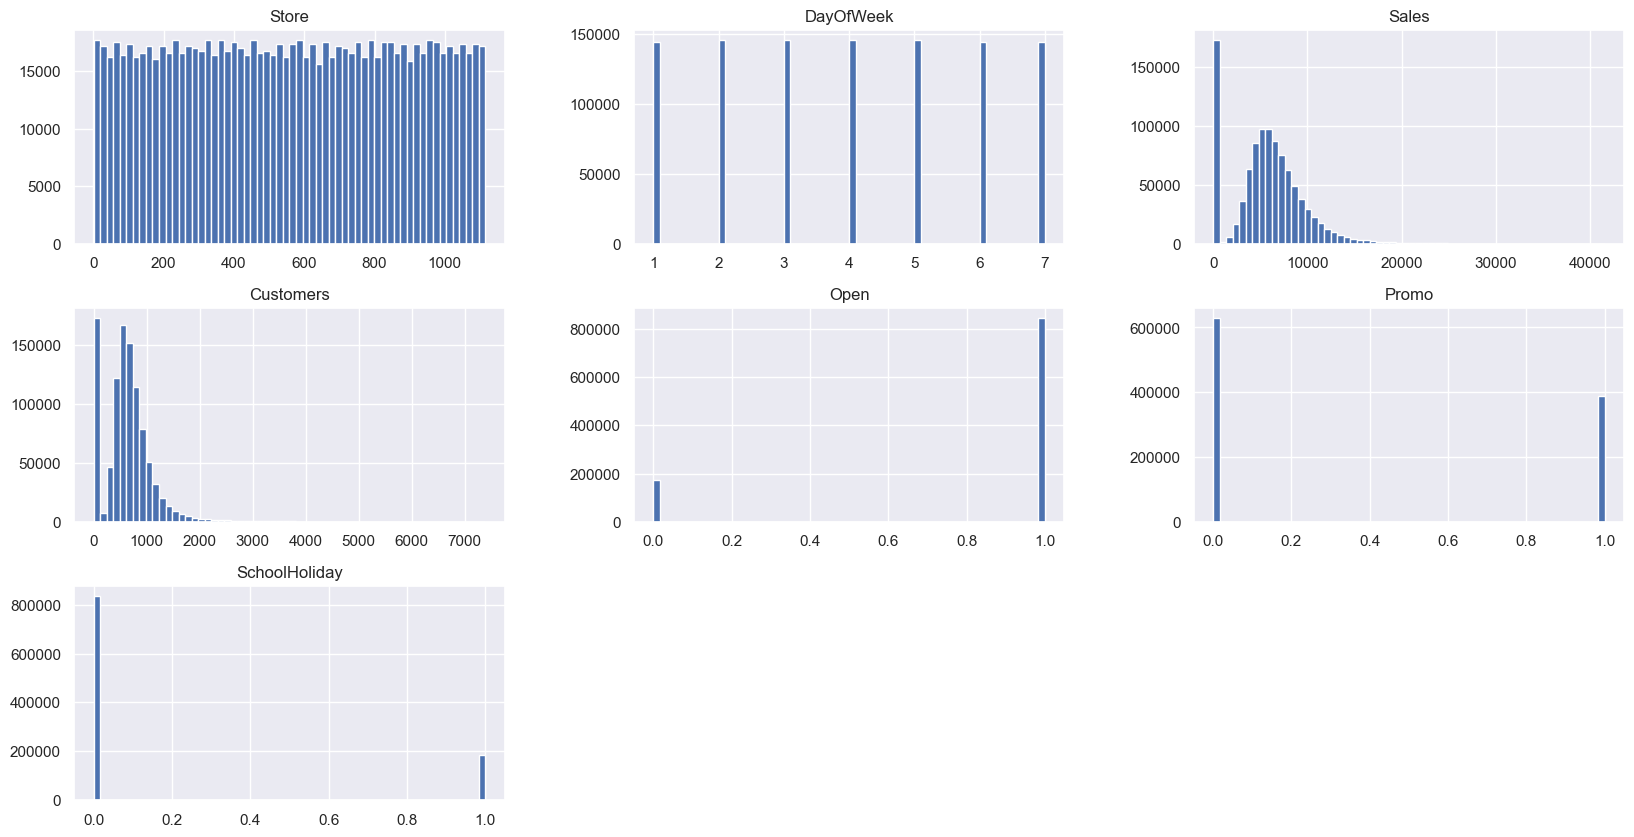

In [13]:
sales_df.hist(figsize=(20, 10), bins = 60)
plt.show()

In [14]:
sales_df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

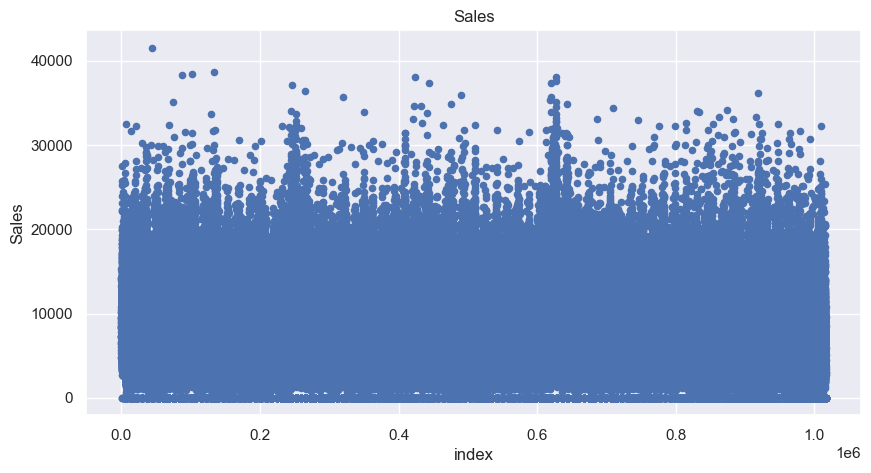

In [15]:
sales_df.reset_index().plot(kind='scatter', y='Sales', x='index', figsize=(10, 5))
plt.title("Sales")
plt.show()

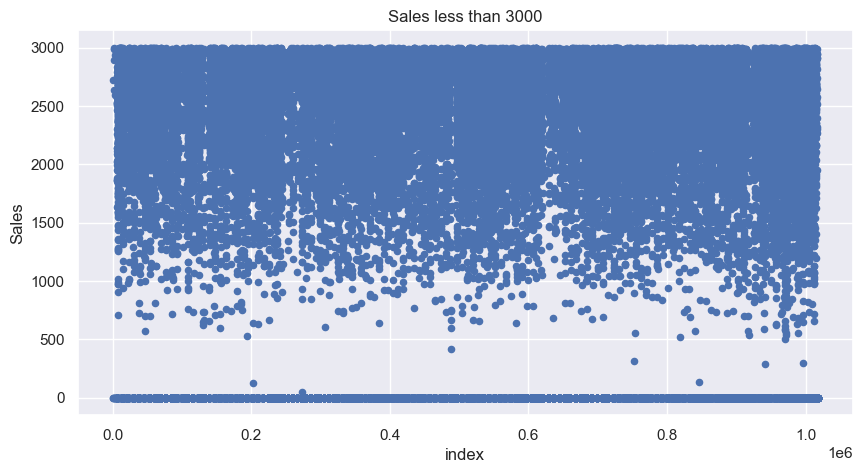

In [16]:
sales_df[sales_df['Sales']<3000].reset_index().plot(kind='scatter', y='Sales', x='index', figsize=(10, 5))
plt.title("Sales less than 3000")
plt.show()

In [17]:
zero_sales = sales_df[sales_df['Sales'] == 0]
print(zero_sales.shape)

(172871, 9)


In [18]:
(zero_sales.shape[0]/sales_df.shape[0])*100

16.994639253093514

Sales_Zeros = 172871

Zeros(%) = 17% of overall sales is zero

In [19]:
sales_df['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

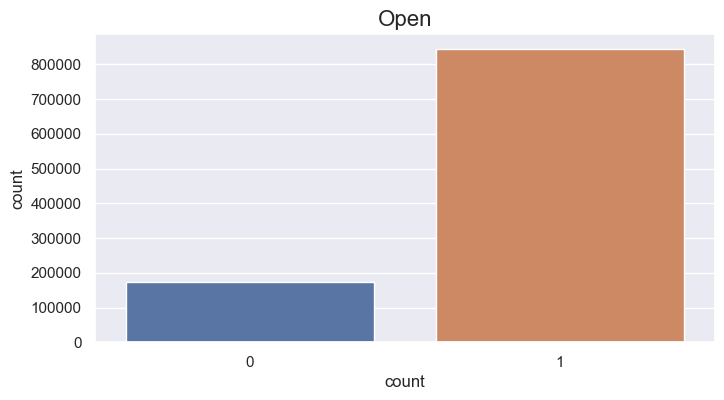

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x=sales_df.Open)
plt.title('Open', fontsize=16)
plt.xlabel('count')
plt.show()

In [21]:
sales_df[sales_df['Sales']==0]['Open'].value_counts()

Open
0    172817
1        54
Name: count, dtype: int64

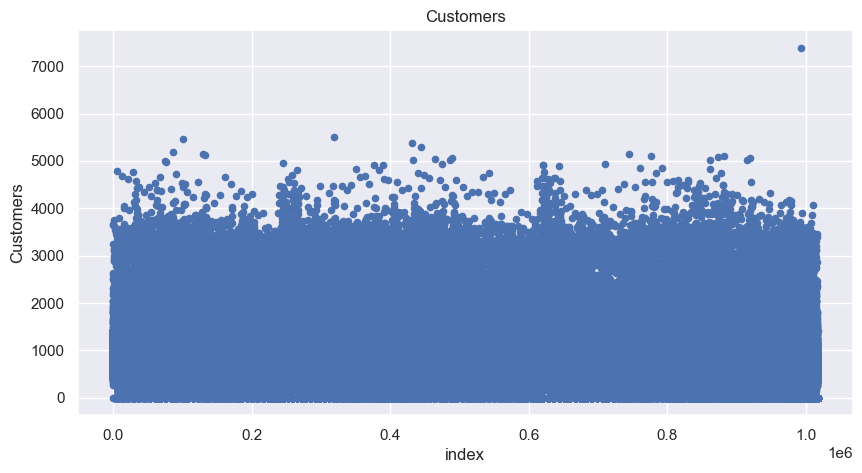

In [22]:
sales_df.reset_index().plot(kind='scatter', y='Customers', x='index', figsize=(10, 5))
plt.title("Customers")
plt.show()

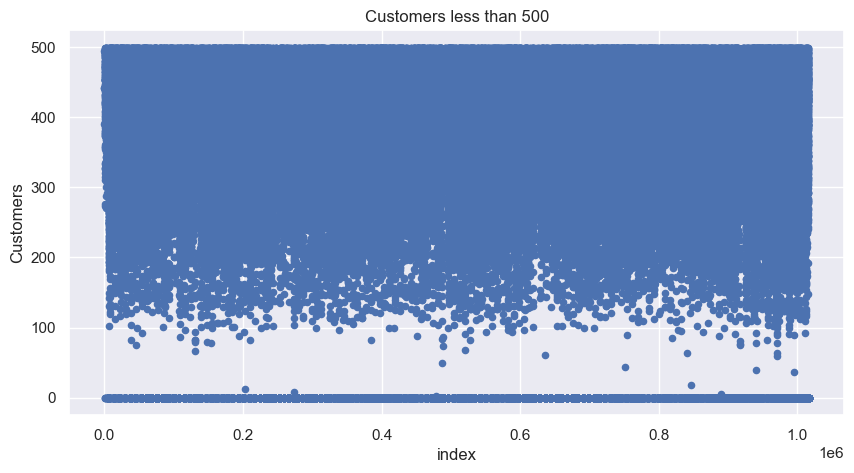

In [23]:
sales_df[sales_df['Customers']<500].reset_index().plot(kind='scatter', y='Customers', x='index', figsize=(10, 5))
plt.title("Customers less than 500")
plt.show()

In [24]:
sales_df[sales_df['Customers'] == 0].shape[0]

172869

In [25]:
sales_df[sales_df['Customers'] == 0]['Open'].value_counts()

Open
0    172817
1        52
Name: count, dtype: int64

[Back to top](#table_of_contents)

In [26]:
sales_df['DayOfWeek'].nunique()

7

In [27]:
sales_df['DayOfWeek'].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [28]:
sales_df[sales_df['Customers'] == 0]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11218
5      7212
1      7173
3      3743
2      1708
6       678
Name: count, dtype: int64

In [29]:
sales_df[sales_df['Sales'] == 0]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11219
5      7212
1      7173
3      3743
2      1709
6       678
Name: count, dtype: int64

In [30]:
sales_df[(sales_df['Open']==0)]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11201
5      7205
1      7170
3      3729
2      1703
6       672
Name: count, dtype: int64

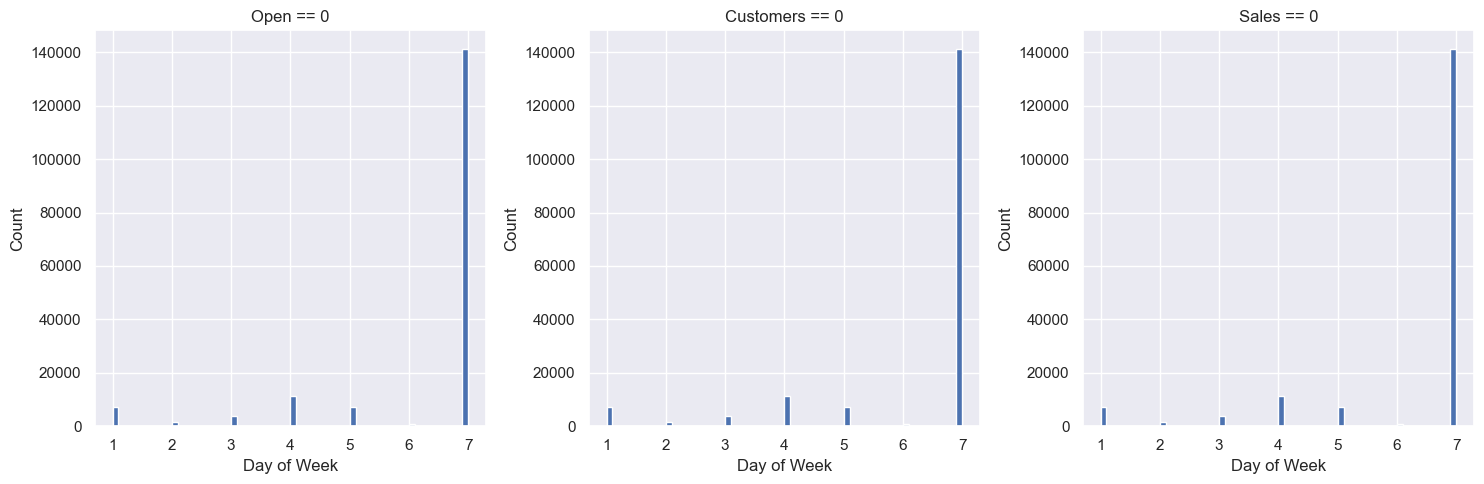

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sales_df[sales_df['Open'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[2])
axes[0].set_title('Open == 0')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

sales_df[sales_df['Customers'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[0])
axes[1].set_title('Customers == 0')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')

sales_df[sales_df['Sales'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[1])
axes[2].set_title('Sales == 0')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [32]:
sale_timeline = sales_df.copy()

In [33]:
sale_timeline['Date'] = pd.to_datetime(sale_timeline['Date'])
sale_timeline['Year'] = sale_timeline['Date'].dt.year

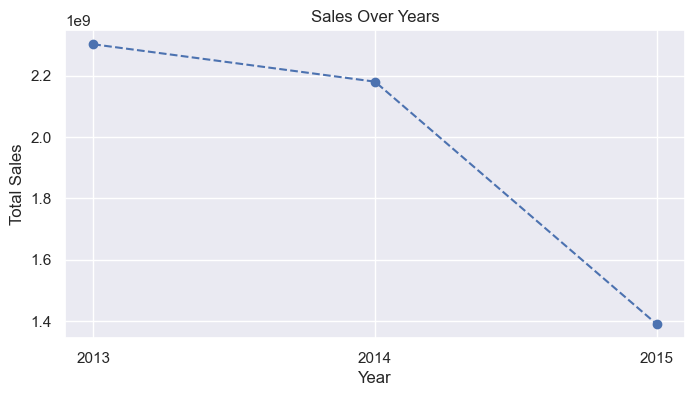

In [34]:
df_yearly_sales = sale_timeline.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_sales['Year'], df_yearly_sales['Sales'], marker='o', linestyle='--', color='b')
plt.title('Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df_yearly_sales['Year'])
plt.show()

In [35]:
sales_df['Promo'].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

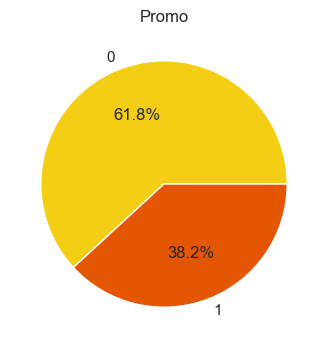

In [36]:
promo_count = sales_df['Promo'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(promo_count, labels=promo_count.index,
        autopct='%1.1f%%', colors=['#F4CE14', '#E55604'])
plt.title('Promo')
plt.show()

In [37]:
sales_df['SchoolHoliday'].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

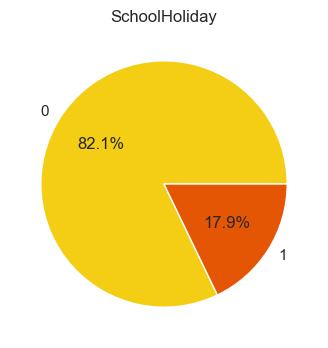

In [38]:
school_holiday_count = sales_df['SchoolHoliday'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(school_holiday_count, labels=school_holiday_count.index,
        autopct='%1.1f%%', colors=['#F4CE14', '#E55604'])
plt.title('SchoolHoliday')
plt.show()

In [39]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [40]:
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

StateHoliday attribute needs correction as the zero(0) is recorded as both int(0) and str ('0')

In [41]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].replace(0, '0')

In [42]:
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [43]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

Observations : 

0 - None - (986159) - 97%

a - public holiday -(20260) - 2%

b - easter holiday - (6690) - 0.65%

c - christmas - (4100) - 0.40 %

overall 3 % of Stateholidays recorded.

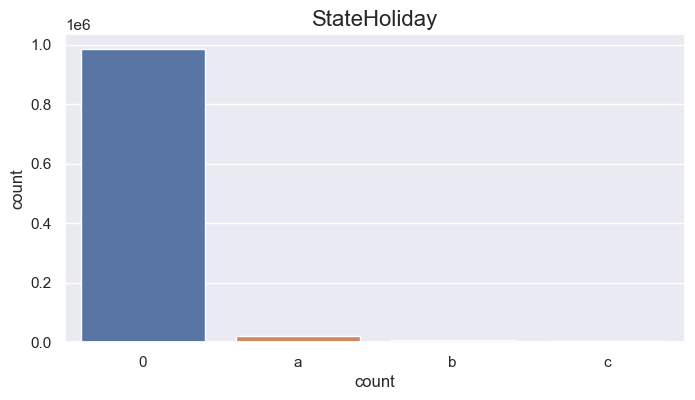

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x=sales_df.StateHoliday)
plt.title('StateHoliday', fontsize=16)
plt.xlabel('count')
plt.show()

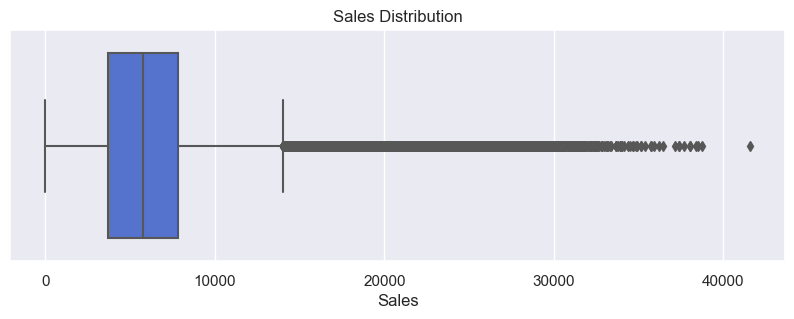

In [45]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=sales_df.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Sales Distribution')
plt.show()

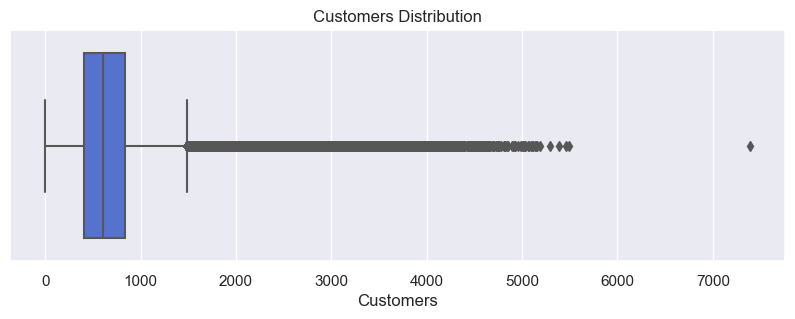

In [46]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=sales_df.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Customers Distribution')
plt.show()

In [47]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':sales_df.Sales.skew(), 
        'Customers':sales_df.Customers.skew()
    }), orient='index', columns=['Skewness'])

Skewness
Sales       0.64146
Customers   1.59865

1. Minimal skewness for Sales attribute as skewness less than 1
2. Customers attribute is highly skewed towards right.

In [48]:
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [49]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [50]:
df_store.isna().sum() # checking for missing values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

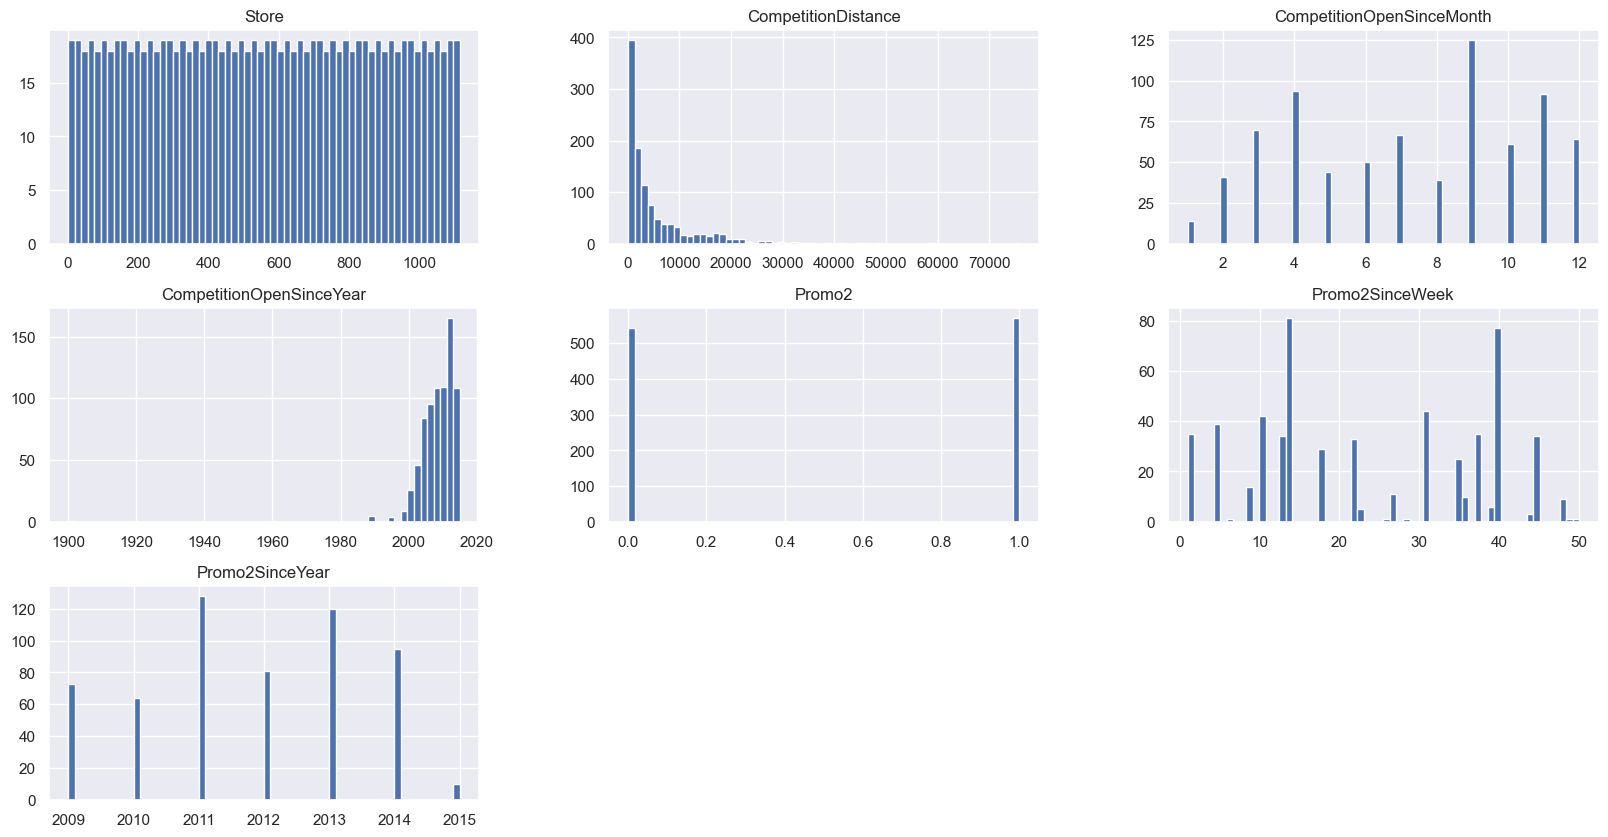

In [51]:
df_store.hist(figsize=(20, 10), bins = 60)
plt.show()

In [52]:
df_store[df_store['Promo2']==0].shape

(544, 10)

In [53]:
df_store[df_store['Promo2']==0].head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   
5      6         a          a                310.0                       12.0   
6      7         a          c              24000.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   
5                    2013.0       0              NaN              NaN   
6                    2013.0       0              NaN              NaN   

  PromoInterval  
0           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN

In [54]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

Obervations

1. No data recorded in attributes 'Promo2SinceWeek','Promo2SinceYear' and 'PromoInterval' 
   as the store is not participating in the Promo2 (Promo2 = 0)

2. 31.7% data is missing from attributes CompetitionOpenSinceMonth & CompetitionOpenSinceYear attributes

In [55]:
df_store['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

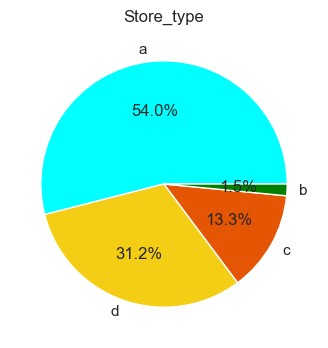

In [56]:
Store_type = df_store['StoreType'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Store_type, labels=Store_type.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604', 'green'])
plt.title('Store_type')
plt.show()

In [57]:
df_store['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

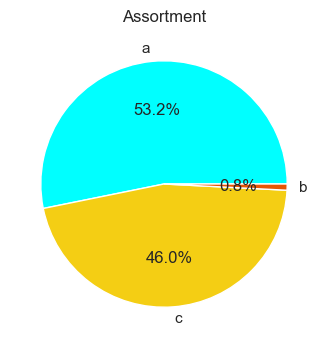

In [58]:
Assortment = df_store['Assortment'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Assortment, labels=Assortment.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604', 'green'])
plt.title('Assortment')
plt.show()

In [59]:
df_sales_clean = sales_df.copy()

In [60]:
#checking for missing values
df_sales_clean.isna().sum().sum()

0

### Clearing outliers / extreme values

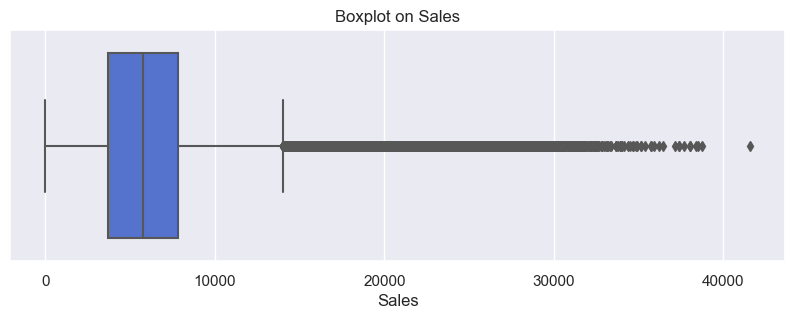

In [61]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Sales')
plt.show()

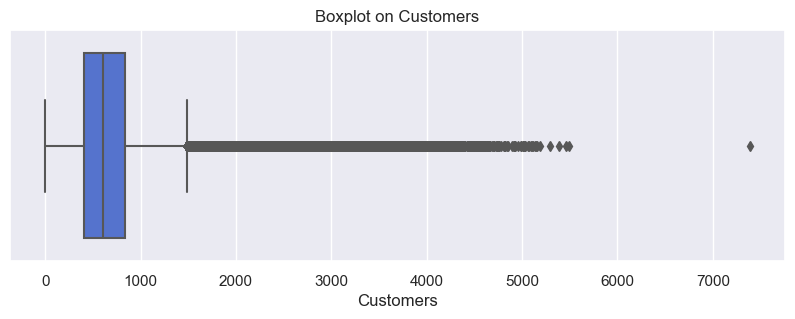

In [62]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Customers')
plt.show()

In [63]:
def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)

In [64]:
remove_outliers('Sales', df_sales_clean)

(9731, 10)


In [65]:
remove_outliers('Customers', df_sales_clean)

(10501, 10)


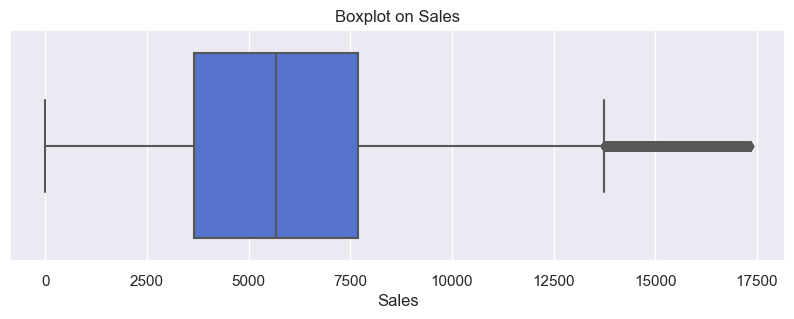

In [66]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Sales')
plt.show()

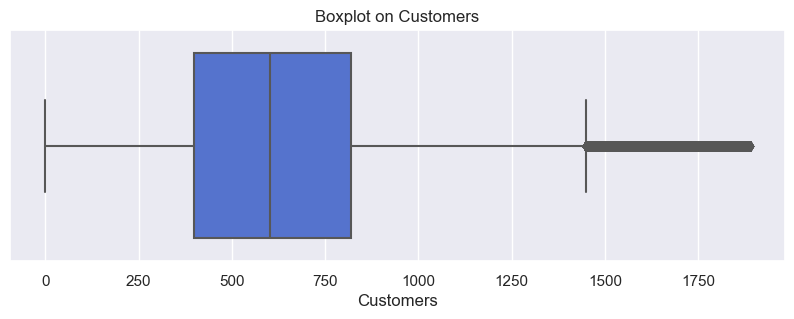

In [67]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Customers')
plt.show()

In [68]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':df_sales_clean.Sales.skew(), 
        'Customers':df_sales_clean.Customers.skew()
    }), orient='index', columns=['Skewness'])

Skewness
Sales       0.10212
Customers   0.22518

In [69]:
df_sales_clean = df_sales_clean[df_sales_clean['Sales'] < 15000]
df_sales_clean = df_sales_clean[df_sales_clean['Customers'] < 1500]

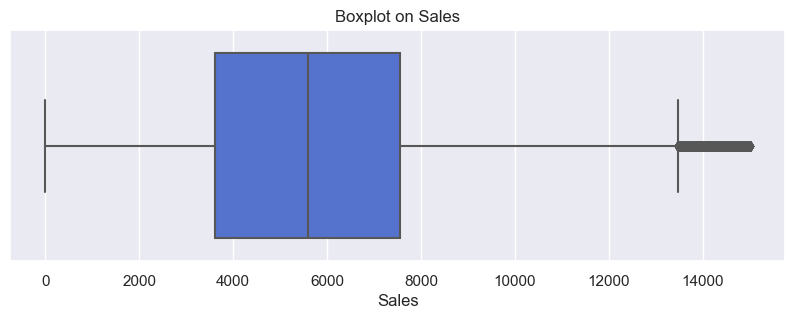

In [70]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Sales')
plt.show()

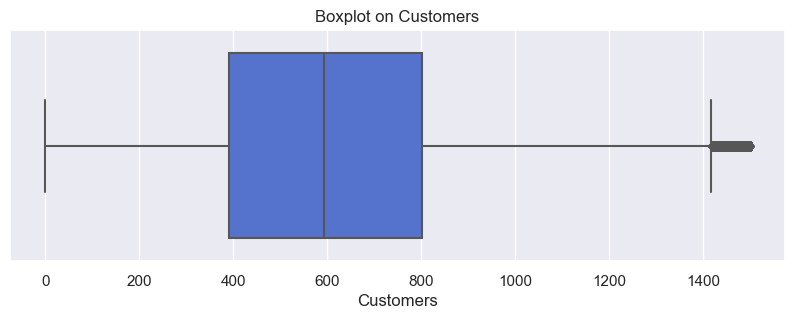

In [71]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Customers')
plt.show()

In [72]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':df_sales_clean.Sales.skew(), 
        'Customers':df_sales_clean.Customers.skew()
    }), orient='index', columns=['Skewness'])

Skewness
Sales     -0.059760
Customers -0.065484

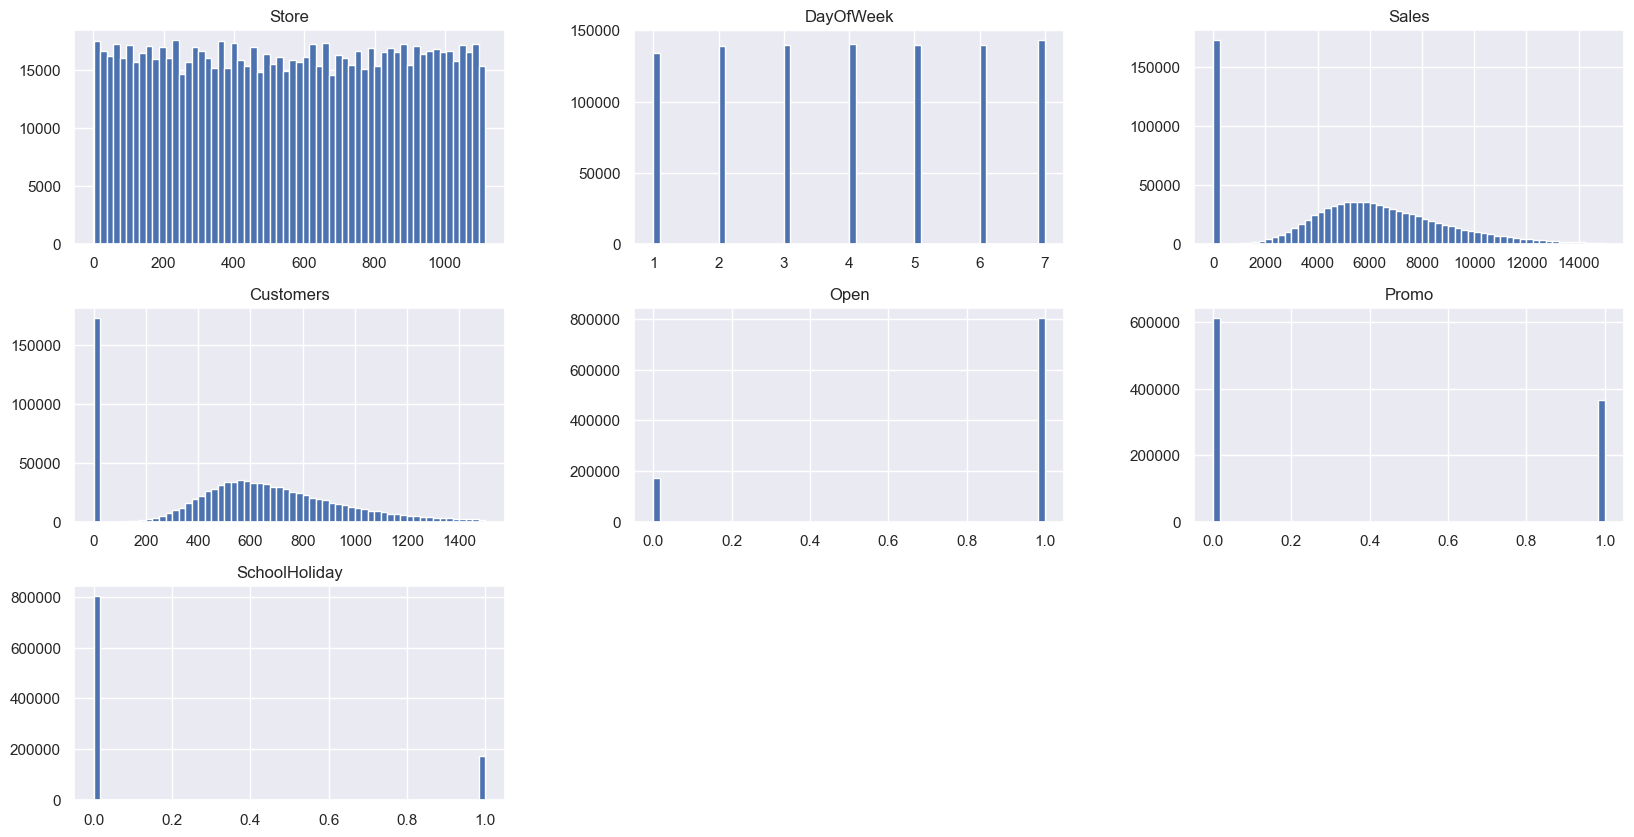

In [73]:
df_sales_clean.hist(figsize=(20, 10), bins = 60)
plt.show()

In [74]:
df_store_clean = df_store.copy()

In [75]:
# checking missing values
df_store_clean.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

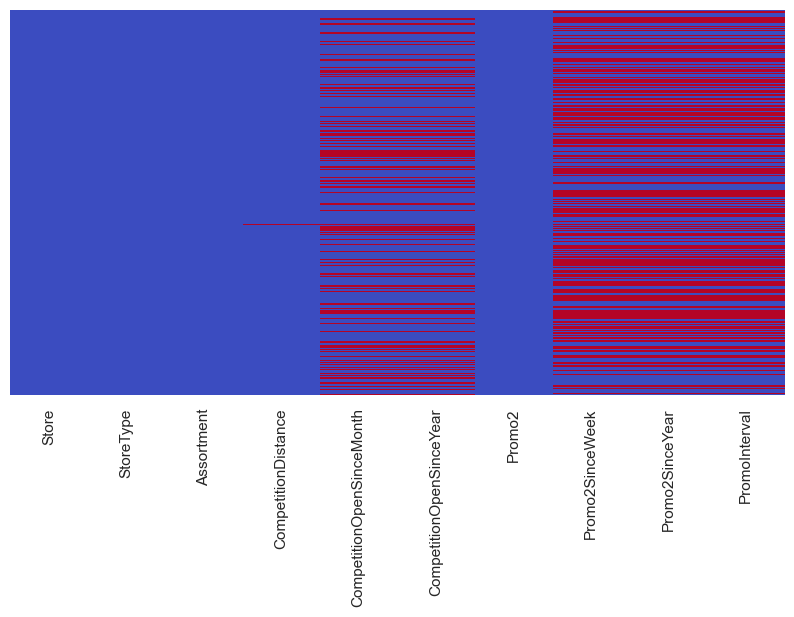

In [76]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_store_clean.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [77]:
#clearing missing data
df_store_clean['CompetitionDistance'].fillna(df_store_clean['CompetitionDistance'].mean(), inplace=True)
df_store_clean['Promo2SinceWeek'].fillna(0, inplace=True)
df_store_clean['Promo2SinceYear'].fillna(0, inplace=True)
df_store_clean['PromoInterval'].fillna('NoPromo', inplace=True)
df_store_clean['CompetitionOpenSinceMonth'].fillna(df_store_clean['CompetitionOpenSinceMonth'].mean(), inplace=True)
df_store_clean['CompetitionOpenSinceYear'].fillna(df_store_clean['CompetitionOpenSinceYear'].median(), inplace=True)

In [78]:
df_store_clean.isna().sum().sum()

0

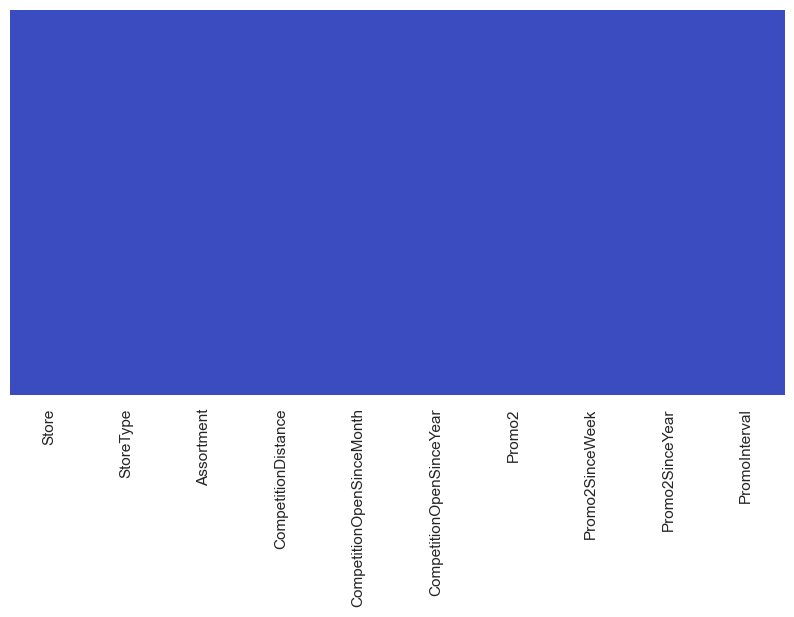

In [79]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_store_clean.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [80]:
df_store_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [81]:
# changing dtypes to int
df_store_clean['CompetitionOpenSinceMonth'] = df_store_clean['CompetitionOpenSinceMonth'].astype('int')
df_store_clean['CompetitionOpenSinceYear'] = df_store_clean['CompetitionOpenSinceYear'].astype('int')
df_store_clean['Promo2SinceWeek'] = df_store_clean['Promo2SinceWeek'].astype('int')
df_store_clean['Promo2SinceYear'] = df_store_clean['Promo2SinceYear'].astype('int')

In [82]:
df_sales_new_feat = df_sales_clean.copy()

In [83]:
df_sales_new_feat.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [84]:
df_sales_new_feat['Date'] = pd.to_datetime(df_sales_new_feat['Date'])

In [85]:
df_sales_new_feat['Date'].info()

<class 'pandas.core.series.Series'>
Index: 975812 entries, 0 to 1017208
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
975812 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.9 MB


In [86]:
# extracting dayoftheweek, weekend, month and year feature 
df_sales_new_feat['date_year'] = df_sales_new_feat['Date'].dt.year
df_sales_new_feat['date_month'] = df_sales_new_feat['Date'].dt.month
df_sales_new_feat['date_dow_name'] = df_sales_new_feat['Date'].dt.day_name()
df_sales_new_feat['date_is_weekend'] = np.where(df_sales_new_feat['date_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)

In [87]:
df_sales_new_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975812 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            975812 non-null  int64         
 1   DayOfWeek        975812 non-null  int64         
 2   Date             975812 non-null  datetime64[ns]
 3   Sales            975812 non-null  int64         
 4   Customers        975812 non-null  int64         
 5   Open             975812 non-null  int64         
 6   Promo            975812 non-null  int64         
 7   StateHoliday     975812 non-null  object        
 8   SchoolHoliday    975812 non-null  int64         
 9   date_year        975812 non-null  int32         
 10  date_month       975812 non-null  int32         
 11  date_dow_name    975812 non-null  object        
 12  date_is_weekend  975812 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(7), object(2)
memory usage: 93.1+ MB


In [88]:
df_sales_new_feat.drop(columns=['Date', 'date_dow_name'], axis=1, inplace=True)

In [89]:
df_sales_new_feat.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend'],
      dtype='object')

In [90]:
df_sales_new_feat = df_sales_new_feat[['Store', 'DayOfWeek', 'Sales','Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'date_year', 'date_month', 'date_is_weekend']]

In [91]:
df_sales_new_feat.sample(4)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
182729    985          3   8747        789     1      1            0   
908253    314          1   6950        778     1      1            0   
338843    658          6   3875        427     1      0            0   
603640     96          1   9883        858     1      1            0   

        SchoolHoliday  date_year  date_month  date_is_weekend  
182729              0       2015           2                0  
908253              0       2013           4                0  
338843              0       2014           9                1  
603640              0       2014           1                0

### Store data feature extraction
[Back to top](#table_of_contents)

In [92]:
df_store_new_feat = df_store_clean.copy()

In [93]:
df_store_new_feat.CompetitionDistance.describe()

count     1115.000000
mean      5404.901079
std       7652.849306
min         20.000000
25%        720.000000
50%       2330.000000
75%       6875.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [94]:
ranges = [0, 702.5, 2285, 6360, 27650, float('inf')]
label = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']

df_store_new_feat['CompetitionDistanceRange'] = pd.cut(df_store_new_feat['CompetitionDistance'],
                                                           bins=ranges,
                                                           labels=label,
                                                           include_lowest=True,
                                                           right=False
                                                       )

In [95]:
df_store_new_feat.CompetitionOpenSinceYear.describe()

count    1115.000000
mean     2009.091480
std         5.155105
min      1900.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

In [96]:
def competetionOpenSince(year):
    if year < 2000:
        return 'Before 2000'
    elif 2000 <= year <= 2005:
        return '2000-2005'
    elif 2006 <= year <= 2010:
        return '2006-2010'
    elif 2011 <= year <= 2015:
        return '2011-2015'
    else:
        return 'Unknown'
    
df_store_new_feat['CompetitionOpenSinceYear1'] = df_store_new_feat['CompetitionOpenSinceYear'].apply(competetionOpenSince)

In [97]:
df_store_new_feat.CompetitionOpenSinceYear1.value_counts()

CompetitionOpenSinceYear1
2006-2010      612
2011-2015      327
2000-2005      156
Before 2000     20
Name: count, dtype: int64

In [98]:
df_store_new_feat.drop(columns=['CompetitionDistance', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

In [99]:
df_store_new_feat.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth',
       'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionDistanceRange', 'CompetitionOpenSinceYear1'],
      dtype='object')

In [100]:
# Rearranging columns
df_store_new_feat = df_store_new_feat[['Store', 'StoreType', 'Assortment', 'CompetitionDistanceRange',
                                       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear1','Promo2',
                                       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
                                     ]]

In [101]:
df_store_new_feat.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistanceRange        5
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear1       4
Promo2                          2
Promo2SinceWeek                25
Promo2SinceYear                 8
PromoInterval                   4
dtype: int64

In [102]:
df_store_new_feat.sample(4)

Store StoreType Assortment CompetitionDistanceRange  \
427    428         d          a                 Moderate   
208    209         a          c                      Far   
513    514         c          c                    Close   
51      52         d          c               Very Close   

     CompetitionOpenSinceMonth CompetitionOpenSinceYear1  Promo2  \
427                         12                 2011-2015       1   
208                          9                 2011-2015       1   
513                          7                 2011-2015       1   
51                           4                 2011-2015       1   

     Promo2SinceWeek  Promo2SinceYear     PromoInterval  
427               23             2015  Mar,Jun,Sept,Dec  
208               31             2013   Jan,Apr,Jul,Oct  
513               27             2012   Jan,Apr,Jul,Oct  
51                39             2010   Jan,Apr,Jul,Oct

In [103]:
# merging sales and stores data

In [104]:
df_merge = pd.merge(df_sales_new_feat, df_store_new_feat, on='Store', how='inner')

In [105]:
df_merge.sample(4)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
472084    559          3   6720        775     1      1            0   
909079   1071          2   4831        636     1      0            0   
420477    493          7      0          0     0      0            0   
328348    377          6   5989        710     1      0            0   

        SchoolHoliday  date_year  date_month  date_is_weekend StoreType  \
472084              0       2015           3                0         d   
909079              1       2014           7                0         a   
420477              0       2014          10                1         d   
328348              0       2013           2                1         a   

       Assortment CompetitionDistanceRange  CompetitionOpenSinceMonth  \
472084          a                 Moderate                         11   
909079          a                    Close                          3   
420477          c                    Close                          7   
328348          c               Very Close                          6   

       CompetitionOpenSinceYear1  Promo2  Promo2SinceWeek  Promo2SinceYear  \
472084                 2006-2010       1                5             2013   
909079                 2011-2015       1               35             2012   
420477                 2006-2010       1               14             2011   
328348                 2006-2010       1               18             2010   

           PromoInterval  
472084   Feb,May,Aug,Nov  
909079  Mar,Jun,Sept,Dec  
420477   Jan,Apr,Jul,Oct  
328348   Feb,May,Aug,Nov

In [106]:
df_merge.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend', 'StoreType', 'Assortment',
       'CompetitionDistanceRange', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear1', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [107]:
df_merge.isna().sum().sum()

0

In [108]:
df_merge.shape

(975812, 20)

In [109]:
df_merge.duplicated().sum()

107282

#### Droping duplicate values

In [110]:
df_merge = df_merge.drop_duplicates()

In [111]:
df_merge.duplicated().sum()

0

In [112]:
df_merge.shape

(868530, 20)

In [113]:
df_merge.drop(columns=['Store'], axis=1, inplace=True)

In [114]:
df_merge.StateHoliday = df_merge.StateHoliday.map({'0':0, 'a':1,'b':2, 'c':3})
df_merge.Assortment = df_merge.Assortment.map({'a':0, 'c':1, 'b':2})
df_merge.CompetitionDistanceRange = df_merge.CompetitionDistanceRange.map({'Very Close':0, 
                                                                          'Close':1,
                                                                          'Moderate':2,
                                                                          'Far':3,
                                                                          'Very Far':4})

df_merge.CompetitionOpenSinceYear1 = df_merge.CompetitionOpenSinceYear1.map({ 'Before 2000': 0,
                                                                                '2000-2005': 1,
                                                                                '2006-2010': 2,
                                                                                '2011-2015': 3})

df_merge.StoreType = df_merge.StoreType.map({'a':0, 'b':1, 'c':2, 'd':3})

df_merge.PromoInterval = df_merge.PromoInterval.map({'NoPromo':0,
                                                     'Jan,Apr,Jul,Oct':1,
                                                     'Feb,May,Aug,Nov':2,
                                                     'Mar,Jun,Sept,Dec':3})

In [115]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868530 entries, 0 to 975811
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   DayOfWeek                  868530 non-null  int64   
 1   Sales                      868530 non-null  int64   
 2   Customers                  868530 non-null  int64   
 3   Open                       868530 non-null  int64   
 4   Promo                      868530 non-null  int64   
 5   StateHoliday               868530 non-null  int64   
 6   SchoolHoliday              868530 non-null  int64   
 7   date_year                  868530 non-null  int32   
 8   date_month                 868530 non-null  int32   
 9   date_is_weekend            868530 non-null  int32   
 10  StoreType                  868530 non-null  int64   
 11  Assortment                 868530 non-null  int64   
 12  CompetitionDistanceRange   868530 non-null  category
 13  CompetitionOpenSinc

In [116]:
df_merge.CompetitionDistanceRange = df_merge.CompetitionDistanceRange.astype('int32')

In [117]:
df_merge.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'date_year', 'date_month', 'date_is_weekend',
       'StoreType', 'Assortment', 'CompetitionDistanceRange',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear1', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [118]:
df_merge.sample(4)

DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
180433          1   9551       1067     1      1             0              1   
429701          7      0          0     0      0             0              0   
818785          2   5890        724     1      1             0              0   
143871          7      0          0     0      0             0              0   

        date_year  date_month  date_is_weekend  StoreType  Assortment  \
180433       2015           1                0          0           1   
429701       2013           9                1          2           1   
818785       2013           3                0          0           0   
143871       2015           3                1          0           0   

        CompetitionDistanceRange  CompetitionOpenSinceMonth  \
180433                         0                          7   
429701                         1                          7   
818785                         1                          2   
143871                         1                          9   

        CompetitionOpenSinceYear1  Promo2  Promo2SinceWeek  Promo2SinceYear  \
180433                          2       1               14             2012   
429701                          2       0                0                0   
818785                          2       0                0                0   
143871                          1       1               13             2010   

        PromoInterval  
180433              1  
429701              0  
818785              0  
143871              1

In [119]:
data_for_model = df_merge.copy()

In [120]:
data_for_model.shape

(868530, 19)

In [121]:
input_features = ['DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend', 'StoreType', 'Assortment',
       'CompetitionDistanceRange', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear1', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
target_feature = ['Sales']

In [122]:
X = data_for_model[input_features]
Y = data_for_model[target_feature]

In [123]:
# Split the data into 50% training and 50% remaining
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.5, random_state=42)

# Split the remaining 50% into 30% validation and 20% testing
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.4, random_state=42)

# Reset indices
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_val = Y_val.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

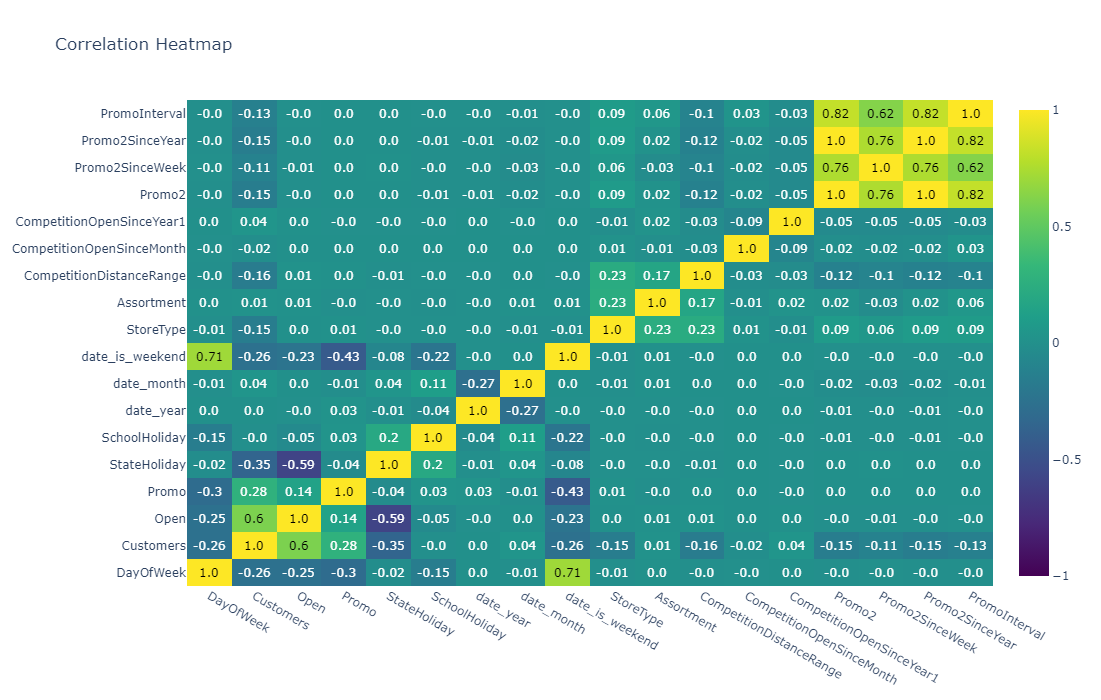

In [124]:
import plotly.graph_objects as go

corr_matrix = X_train.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   z=corr_matrix.values,
                   colorscale='Viridis',
                   zmin=-1, zmax=1))

# Add annotations to display correlations values in each squares
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        fig.add_annotation(
            x=corr_matrix.columns[j],
            y=corr_matrix.columns[i],
            text=str(round(corr_matrix.iloc[i, j], 2)),
            showarrow=False,
            font=dict(color='white' if corr_matrix.iloc[i, j] < 0.5 else 'black')
        )

# Add title and labels
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_nticks=36,
    width=1000, 
    height=700 
)

# Show the plot
fig.show()

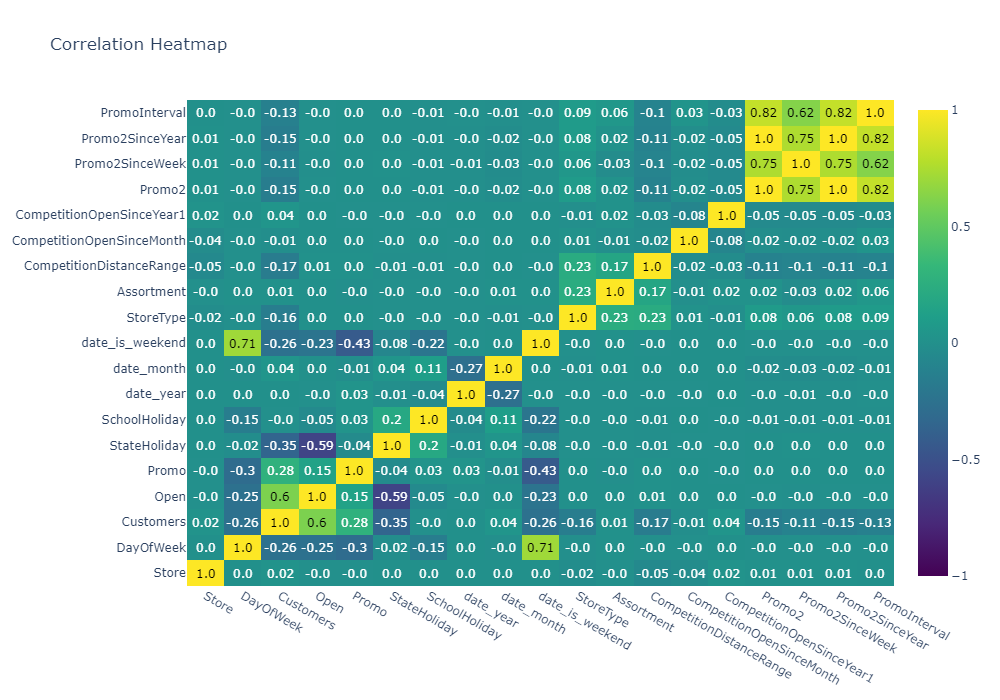

In [125]:
X_train.drop(columns=['DayOfWeek', 'Promo2SinceYear', 'PromoInterval'],
             axis=1, inplace=True)

In [126]:
X_val.drop(columns=['DayOfWeek', 'Promo2SinceYear', 'PromoInterval'],
           axis=1, inplace=True)

In [127]:
X_test.drop(columns=['DayOfWeek', 'Promo2SinceYear', 'PromoInterval'],
            axis=1, inplace=True)

In [128]:
X_train.shape

(434265, 15)

In [129]:
X_val.shape

(260559, 15)

In [130]:
X_test.shape

(173706, 15)

In [131]:
# function for adjusted-R2
def adjusted_r2(r_squared, n, k):
    """
    Parameters:
    r_squared (float): The R-squared value.
    n (int): The number of observations.
    k (int): The number of predictors.
    Returns:
    float: The adjusted R-squared value.
    """
    if n == k + 1:
        raise ValueError("Number of observations must be greater than number of predictors + 1")
    adj_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adj_r2

In [132]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train, Y_train)

LinearRegression()

### Training data

In [133]:
model_at_hand = Linear_regression
y_train_pred = model_at_hand.predict(X_train)

print('mean_absolute_error', mean_absolute_error(Y_train, y_train_pred))
print('mean_squared_error', mean_squared_error(Y_train, y_train_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_train, y_train_pred)))

R2_Score = r2_score(Y_train, y_train_pred)
print('r2 : ', R2_Score)
n = len(Y_train)
k = X_train.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 848.3219116977904
mean_squared_error 1270421.1571851827
root_mean_squared_error 1127.129609754434
r2 :  0.8497316572399064
Adjusted-r2 : 0.8497264666116231


In [134]:
model_at_hand = Linear_regression
y_val_pred = model_at_hand.predict(X_val)

print('mean_absolute_error', mean_absolute_error(Y_val, y_val_pred))
print('mean_squared_error', mean_squared_error(Y_val, y_val_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_val, y_val_pred)))

R2_Score = r2_score(Y_val, y_val_pred)
print('r2 : ', R2_Score)
n = len(Y_val)
k = X_val.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 846.2712525269167
mean_squared_error 1262750.9246222086
root_mean_squared_error 1123.7219071559514
r2 :  0.8496512178879971
Adjusted-r2 : 0.8496425619972932


In [135]:
model_at_hand = Linear_regression
y_test_pred = model_at_hand.predict(X_test)

print('mean_absolute_error', mean_absolute_error(Y_test, y_test_pred))
print('mean_squared_error', mean_squared_error(Y_test, y_test_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_test_pred)))

R2_Score = r2_score(Y_test, y_test_pred)
print('r2 : ', R2_Score)
n = len(Y_test)
k = X_test.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 847.2350220558316
mean_squared_error 1266742.920519768
root_mean_squared_error 1125.4967438956755
r2 :  0.8492486487631956
Adjusted-r2 : 0.8492356297622827


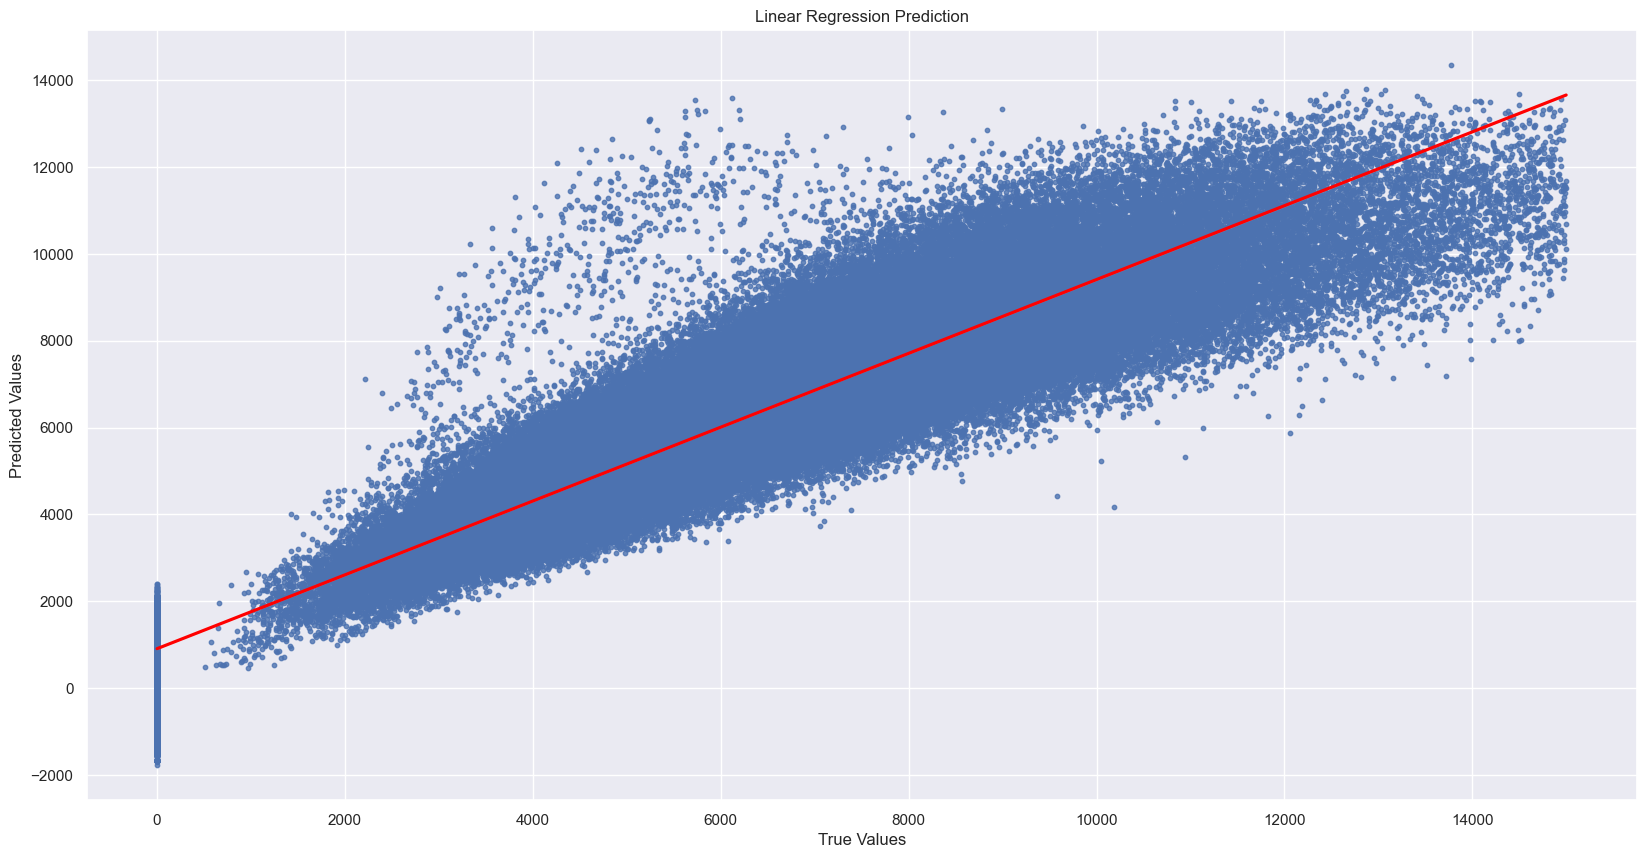

In [136]:
Y_test = np.array(Y_test).flatten()
y_test_pred = np.array(y_test_pred).flatten()

data = {'true': Y_test, 'pred': y_test_pred}
results = pd.DataFrame(data)

plt.figure(figsize=(20, 10))
sns.regplot(x='true', y='pred', data=results, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("Linear Regression Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [137]:
decision_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [138]:
model_at_hand = decision_tree
y_train_pred_dt = model_at_hand.predict(X_train)

print('mean_absolute_error', mean_absolute_error(Y_train, y_train_pred_dt))
print('mean_squared_error', mean_squared_error(Y_train, y_train_pred_dt))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_train, y_train_pred_dt)))

R2_Score = r2_score(Y_train, y_train_pred_dt)
print('r2 : ', R2_Score)
n = len(Y_train)
k = X_train.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 684.7630342705415
mean_squared_error 897338.8738482862
root_mean_squared_error 947.2797231273803
r2 :  0.8938606896581025
Adjusted-r2 : 0.8938570233522385


In [139]:
model_at_hand = decision_tree
y_val_pred_dt = model_at_hand.predict(X_val)

print('mean_absolute_error', mean_absolute_error(Y_val, y_val_pred_dt))
print('mean_squared_error', mean_squared_error(Y_val, y_val_pred_dt))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_val, y_val_pred_dt)))

R2_Score = r2_score(Y_val, y_val_pred_dt)
print('r2 : ', R2_Score)
n = len(Y_val)
k = X_val.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 689.7687944737653
mean_squared_error 912138.8824511515
root_mean_squared_error 955.0596224588031
r2 :  0.8913966583437162
Adjusted-r2 : 0.8913904058244589


In [140]:
model_at_hand = decision_tree
y_test_pred_dt = model_at_hand.predict(X_test)

print('mean_absolute_error', mean_absolute_error(Y_test, y_test_pred_dt))
print('mean_squared_error', mean_squared_error(Y_test, y_test_pred_dt))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_test_pred_dt)))

R2_Score = r2_score(Y_test, y_test_pred_dt)
print('r2 : ', R2_Score)
n = len(Y_test)
k = X_test.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 691.2255119789542
mean_squared_error 914646.3904988627
root_mean_squared_error 956.3714709770794
r2 :  0.8911506217733642
Adjusted-r2 : 0.8911412214585885


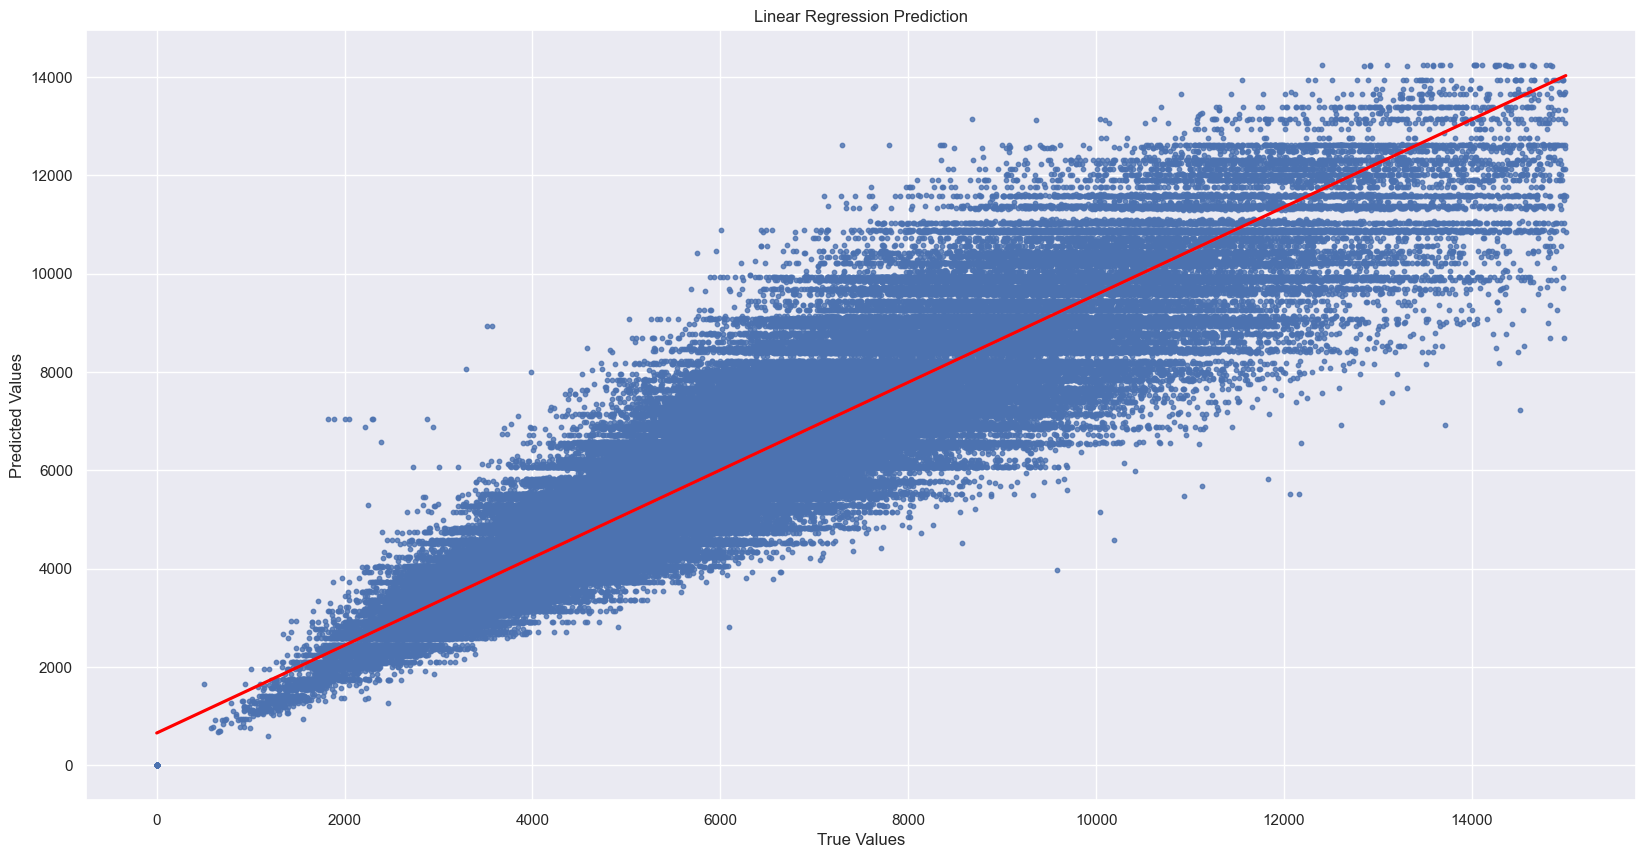

In [141]:
Y_test = np.array(Y_test).flatten()
y_test_pred_dt = np.array(y_test_pred_dt).flatten()

data = {'true': Y_test, 'pred': y_test_pred_dt}
results = pd.DataFrame(data)

plt.figure(figsize=(20, 10))
sns.regplot(x='true', y='pred', data=results, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("Linear Regression Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [142]:
randomForest_regressor = RandomForestRegressor(n_estimators=300, max_depth=10, 
                                               min_samples_leaf=1, min_samples_split=10, random_state=42)
randomForest_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300,
                      random_state=42)

In [143]:
model_at_hand = randomForest_regressor
y_train_pred_rf = model_at_hand.predict(X_train)

print('mean_absolute_error', mean_absolute_error(Y_train, y_train_pred_rf))
print('mean_squared_error', mean_squared_error(Y_train, y_train_pred_rf))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_train, y_train_pred_rf)))

R2_Score = r2_score(Y_train, y_train_pred_rf)
print('r2 : ', R2_Score)
n = len(Y_train)
k = X_train.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 662.6306262234529
mean_squared_error 838737.0438540096
root_mean_squared_error 915.8258807513629
r2 :  0.9007922491855428
Adjusted-r2 : 0.9007888223123383


### Validation data

In [144]:
model_at_hand = randomForest_regressor
y_val_pred_rf = model_at_hand.predict(X_val)

print('mean_absolute_error', mean_absolute_error(Y_val, y_val_pred_rf))
print('mean_squared_error', mean_squared_error(Y_val, y_val_pred_rf))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_val, y_val_pred_rf)))

R2_Score = r2_score(Y_val, y_val_pred_rf)
print('r2 : ', R2_Score)
n = len(Y_val)
k = X_val.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 666.7656869376409
mean_squared_error 850902.2815541207
root_mean_squared_error 922.4436468175824
r2 :  0.8986877623817527
Adjusted-r2 : 0.8986819296264522


### Testing data

In [145]:
model_at_hand = randomForest_regressor
y_test_pred_rf = model_at_hand.predict(X_test)

print('mean_absolute_error', mean_absolute_error(Y_test, y_test_pred_rf))
print('mean_squared_error', mean_squared_error(Y_test, y_test_pred_rf))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_test_pred_rf)))

R2_Score = r2_score(Y_test, y_test_pred_rf)
print('r2 : ', R2_Score)
n = len(Y_test)
k = X_test.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 667.1891192171452
mean_squared_error 851980.600835278
root_mean_squared_error 923.0279523585828
r2 :  0.8986082931880428
Adjusted-r2 : 0.8985995369234209


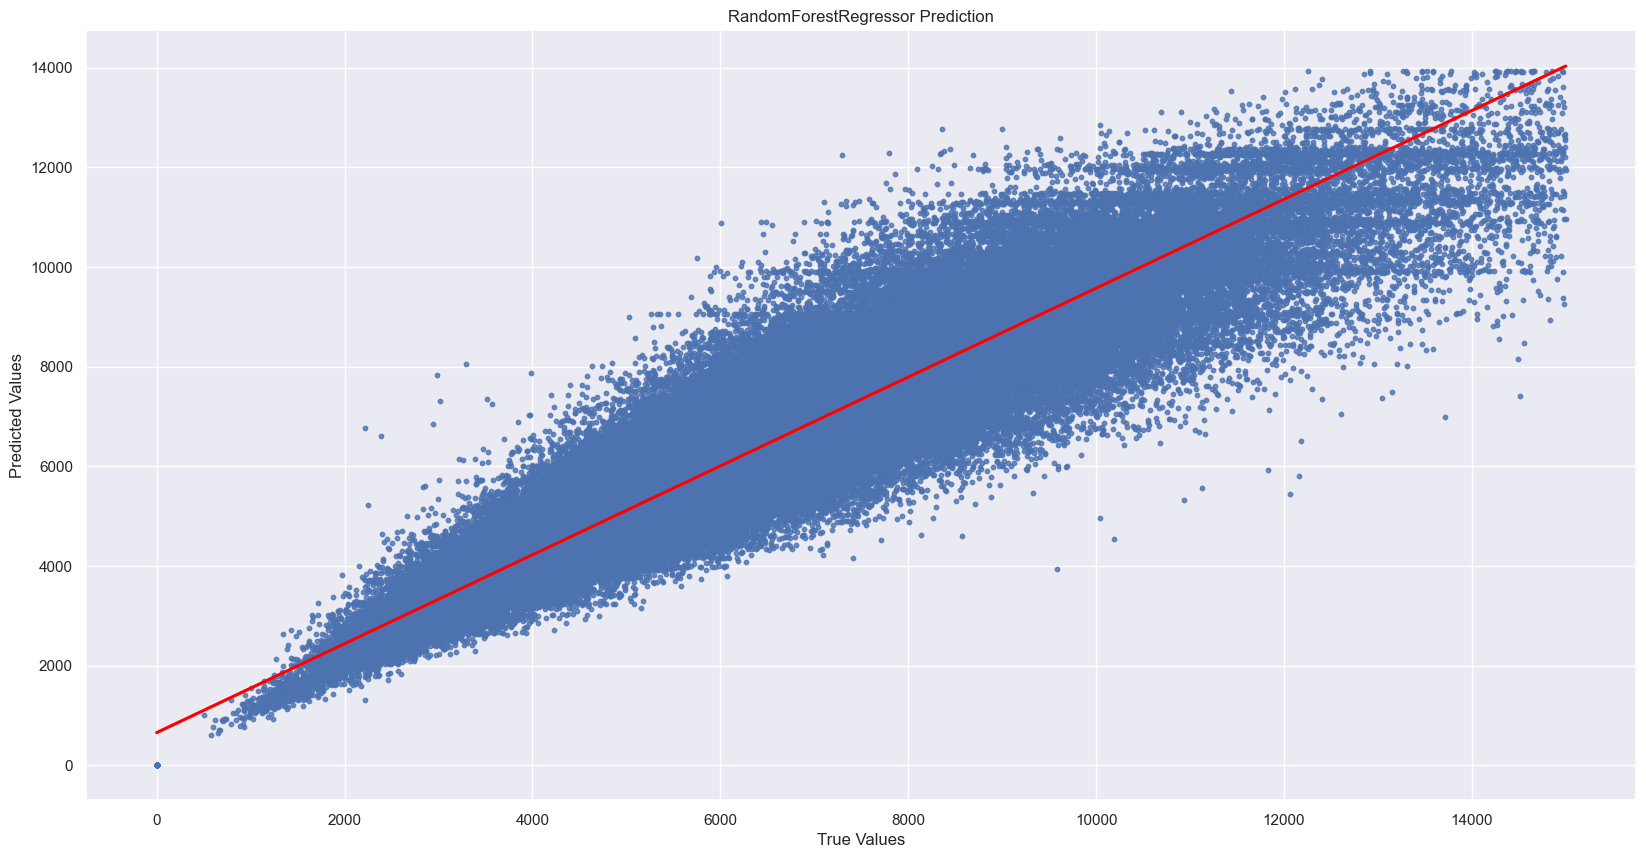

In [146]:
Y_test = np.array(Y_test).flatten()
y_test_pred_rf = np.array(y_test_pred_rf).flatten()

data = {'true': Y_test, 'pred': y_test_pred_rf}
results = pd.DataFrame(data)

plt.figure(figsize=(20, 10))
sns.regplot(x='true', y='pred', data=results, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("RandomForestRegressor Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [147]:
gradient_booster = GradientBoostingRegressor(n_estimators=500, 
                                             max_depth=5,min_samples_split=10,
                                             min_samples_leaf=5,
                                             learning_rate=0.1, random_state=42)
gradient_booster.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                          n_estimators=500, random_state=42)

In [148]:
model_at_hand = gradient_booster
y_train_pred_gb = model_at_hand.predict(X_train)

print('mean_absolute_error', mean_absolute_error(Y_train, y_train_pred_gb))
print('mean_squared_error', mean_squared_error(Y_train, y_train_pred_gb))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_train, y_train_pred_gb)))

R2_Score = r2_score(Y_train, y_train_pred_gb)
print('r2 : ', R2_Score)
n = len(Y_train)
k = X_train.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 509.37470620440644
mean_squared_error 497629.43375333503
root_mean_squared_error 705.4285461712866
r2 :  0.9411392435525556
Adjusted-r2 : 0.9411372103611223


In [149]:
model_at_hand = gradient_booster
y_val_pred_gb = model_at_hand.predict(X_val)

print('mean_absolute_error', mean_absolute_error(Y_val, y_val_pred_gb))
print('mean_squared_error', mean_squared_error(Y_val, y_val_pred_gb))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_val, y_val_pred_gb)))

R2_Score = r2_score(Y_val, y_val_pred_gb)
print('r2 : ', R2_Score)
n = len(Y_val)
k = X_val.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 514.1751850000209
mean_squared_error 507014.6621183516
root_mean_squared_error 712.0496205450513
r2 :  0.9396325629417146
Adjusted-r2 : 0.9396290874633642


In [150]:
model_at_hand = gradient_booster
y_test_pred_gb = model_at_hand.predict(X_test)

print('mean_absolute_error', mean_absolute_error(Y_test, y_test_pred_gb))
print('mean_squared_error', mean_squared_error(Y_test, y_test_pred_gb))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_test_pred_gb)))

R2_Score = r2_score(Y_test, y_test_pred_gb)
print('r2 : ', R2_Score)
n = len(Y_test)
k = X_test.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 513.3922086262515
mean_squared_error 506655.92820248945
root_mean_squared_error 711.7976736422293
r2 :  0.9397043673570933
Adjusted-r2 : 0.939699160180574


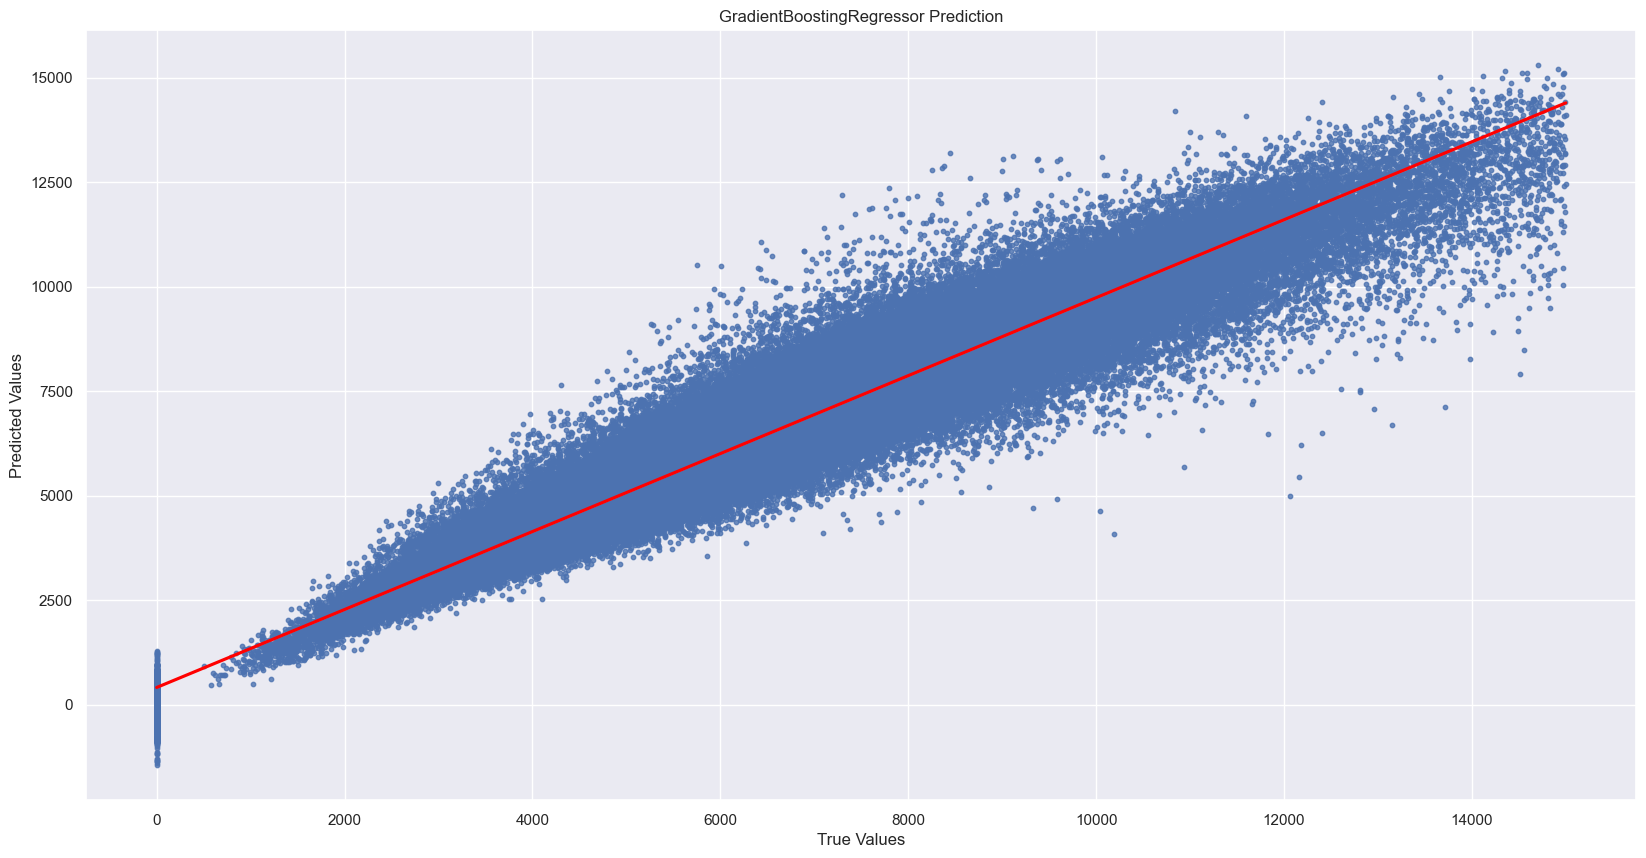

In [151]:
Y_test = np.array(Y_test).flatten()
y_test_pred_gb = np.array(y_test_pred_gb).flatten()

data = {'true': Y_test, 'pred': y_test_pred_gb}
results = pd.DataFrame(data)

plt.figure(figsize=(20, 10))
sns.regplot(x='true', y='pred', data=results, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("GradientBoostingRegressor Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [152]:
base_estimator = DecisionTreeRegressor(max_depth=10)  
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=300, learning_rate=0.1, random_state=42)
adaboost_regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=300, random_state=42)

In [153]:
model_at_hand = adaboost_regressor
y_train_pred_ada = model_at_hand.predict(X_train)

print('mean_absolute_error', mean_absolute_error(Y_train, y_train_pred_ada))
print('mean_squared_error', mean_squared_error(Y_train, y_train_pred_ada))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_train, y_train_pred_ada)))

R2_Score = r2_score(Y_train, y_train_pred_ada)
print('r2 : ', R2_Score)
n = len(Y_train)
k = X_train.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 661.4912482323593
mean_squared_error 765255.044243848
root_mean_squared_error 874.7885711666837
r2 :  0.9094838694735599
Adjusted-r2 : 0.9094807428297267


In [154]:
model_at_hand = adaboost_regressor
y_val_pred_ada = model_at_hand.predict(X_val)

print('mean_absolute_error', mean_absolute_error(Y_val, y_val_pred_ada))
print('mean_squared_error', mean_squared_error(Y_val, y_val_pred_ada))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_val, y_val_pred_ada)))

R2_Score = r2_score(Y_val, y_val_pred_ada)
print('r2 : ', R2_Score)
n = len(Y_val)
k = X_val.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 669.0196654460577
mean_squared_error 794985.349872525
root_mean_squared_error 891.6195095849603
r2 :  0.9053454827712929
Adjusted-r2 : 0.9053400333147409


In [155]:
model_at_hand = adaboost_regressor
y_test_pred_ada = model_at_hand.predict(X_test)

print('mean_absolute_error', mean_absolute_error(Y_test, y_test_pred_ada))
print('mean_squared_error', mean_squared_error(Y_test, y_test_pred_ada))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_test_pred_ada)))

R2_Score = r2_score(Y_test, y_test_pred_ada)
print('r2 : ', R2_Score)
n = len(Y_test)
k = X_test.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 668.0571340165561
mean_squared_error 793784.2481950956
root_mean_squared_error 890.9457044035263
r2 :  0.9055340700409826
Adjusted-r2 : 0.9055259118916972


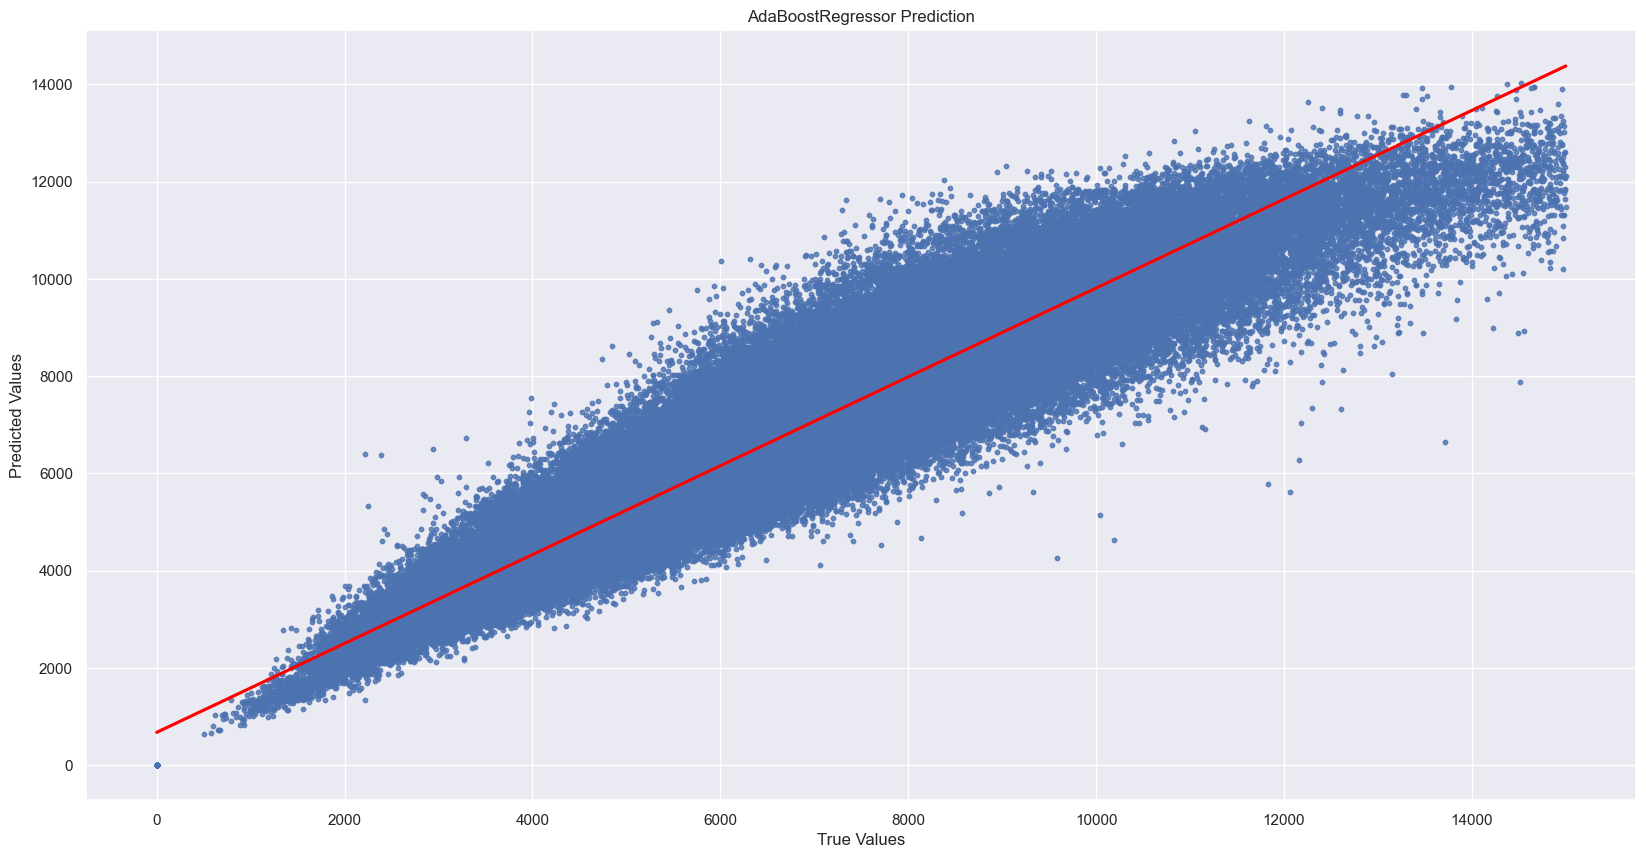

In [156]:
Y_test = np.array(Y_test).flatten()
y_test_pred_ada = np.array(y_test_pred_ada).flatten()

data = {'true': Y_test, 'pred': y_test_pred_ada}
results = pd.DataFrame(data)

plt.figure(figsize=(20, 10))
sns.regplot(x='true', y='pred', data=results, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("AdaBoostRegressor Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [169]:
xgboost = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=2,
             num_parallel_tree=None, random_state=None, ...)

In [170]:
model_at_hand = xgboost
y_train_pred_xgb = model_at_hand.predict(X_train)

print('mean_absolute_error', mean_absolute_error(Y_train, y_train_pred_xgb))
print('mean_squared_error', mean_squared_error(Y_train, y_train_pred_xgb))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_train, y_train_pred_xgb)))

R2_Score = r2_score(Y_train, y_train_pred_xgb)
print('r2 : ', R2_Score)
n = len(Y_train)
k = X_train.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 409.2964975125055
mean_squared_error 339637.88554671773
root_mean_squared_error 582.7845961817434
r2 :  0.9598268480409066
Adjusted-r2 : 0.9598254603640682


In [171]:
model_at_hand = xgboost
y_val_pred_xgb = model_at_hand.predict(X_val)

print('mean_absolute_error', mean_absolute_error(Y_val, y_val_pred_xgb))
print('mean_squared_error', mean_squared_error(Y_val, y_val_pred_xgb))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_val, y_val_pred_xgb)))

R2_Score = r2_score(Y_val, y_val_pred_xgb)
print('r2 : ', R2_Score)
n = len(Y_val)
k = X_val.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 427.2426332609709
mean_squared_error 369210.7245661449
root_mean_squared_error 607.6271262593079
r2 :  0.956040117097663
Adjusted-r2 : 0.9560375862361794


In [172]:
model_at_hand = xgboost
y_test_pred_xgb = model_at_hand.predict(X_test)

print('mean_absolute_error', mean_absolute_error(Y_test, y_test_pred_xgb))
print('mean_squared_error', mean_squared_error(Y_test, y_test_pred_xgb))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_test_pred_xgb)))

R2_Score = r2_score(Y_test, y_test_pred_xgb)
print('r2 : ', R2_Score)
n = len(Y_test)
k = X_test.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 426.68219768788504
mean_squared_error 370602.0162675934
root_mean_squared_error 608.7709062263024
r2 :  0.9558957434705853
Adjusted-r2 : 0.9558919345935748


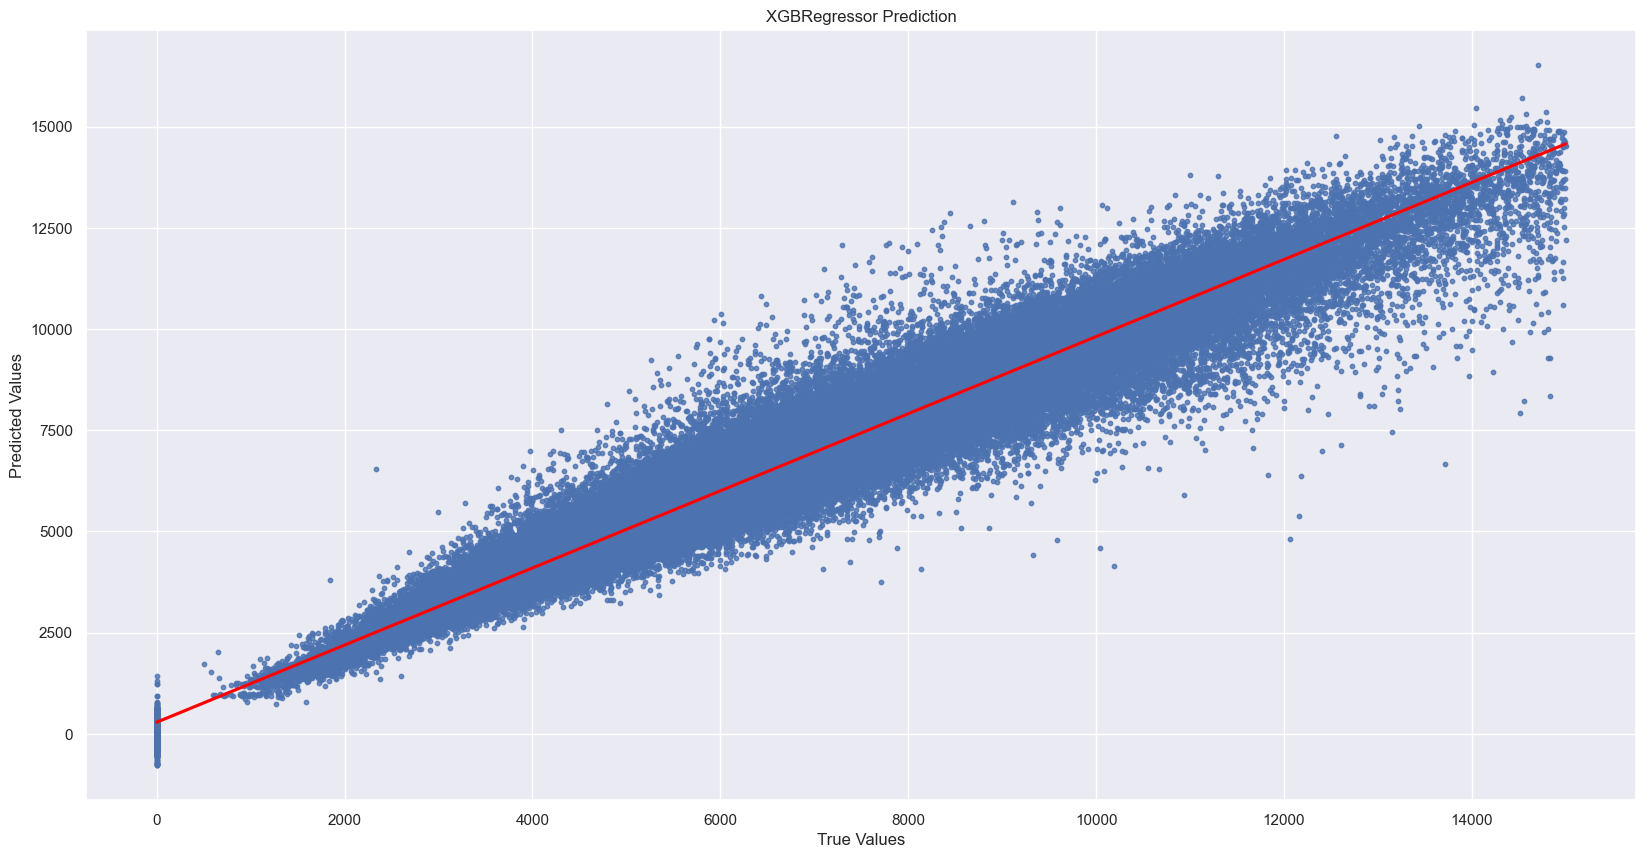

In [173]:
Y_test = np.array(Y_test).flatten()
y_test_pred_xgb = np.array(y_test_pred_xgb).flatten()

data = {'true': Y_test, 'pred': y_test_pred_xgb}
results = pd.DataFrame(data)

plt.figure(figsize=(20, 10))
sns.regplot(x='true', y='pred', data=results, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("XGBRegressor Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [185]:
Model_evaluation_scores = {
    'Model': [
        'LinearRegression',
        'DecisionTreeRegressor',
        'RandomForestRegressor',
        'GradientBoostingRegressor',
        'AdaBoostRegressor',
        'XGBoostRegressor'
    ],
    'R² Score': [
        0.849248,
        0.891150,
        0.898608,
        0.939704,
        0.905534,
        0.955895
    ],
    'Adjusted R² Score': [
        0.849235,
        0.891141,
        0.898599,
        0.939699,
        0.905525,
        0.955891
    ]
}

result = pd.DataFrame(Model_evaluation_scores)
result.index = result.index + 1
result

Model  R² Score  Adjusted R² Score
1           LinearRegression  0.849248           0.849235
2      DecisionTreeRegressor  0.891150           0.891141
3      RandomForestRegressor  0.898608           0.898599
4  GradientBoostingRegressor  0.939704           0.939699
5          AdaBoostRegressor  0.905534           0.905525
6           XGBoostRegressor  0.955895           0.955891